# Classification of diabetes dataset
- Developing a the model to predict if a person has (Outcome = 1) or does not have (Outcome = 0) diabetes.
- The data used in this example is the diabetes dataset.
- For Each Attribute: (all numeric-valued)
    1. Number of times pregnant
    2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    3. Diastolic blood pressure (mm Hg)
    4. Triceps skin fold thickness (mm)
    5. 2-Hour serum insulin (mu U/ml)
    6. Body mass index (weight in kg/(height in m)^2)
    7. Diabetes pedigree function
    8. Age (years)
    9. Class variable (0 or 1)

# Import libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data preparation
- Load data and use different methods to find out more about your data (i.e. size, missing values, statistical summary etc..)
- Prepare your data:
    - Handle missing values
    - Normalization
    - Data standardization
    - Conert categorical variables to numerical

#### Load data

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

#### Check for missing values

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Statistical summary

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### Class distribution
- Check if data is imbalanced

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

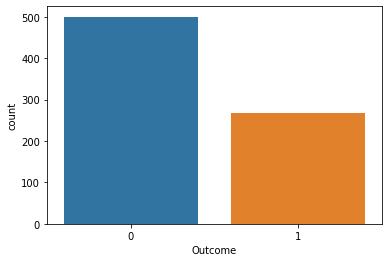

In [ ]:
sns.countplot(x=df.Outcome, data=df)
plt.show()

# Features and Target
- Create your $X$ variable that will hold all your features
- Create your $y$ variable that will hold your target variable/labels (what we're predicting)

#### Creating variables for my features and target  

In [ ]:
# features
X = df.drop(columns=['Outcome'])

# target
y = df['Outcome']

print('Features: \n')
X.head()

Features: 



Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [ ]:
print('Target: \n')
y.head()

Target: 



0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

## Train and Test Datasets
- Splitting the dataset into training and testing datasets (select a ratio i.e. 70:30, 80:20, etc...)
    - Training datasets will be used to train our model
    - Testing datasets will be used to evaluate our model's performance
        - `X_train` contains the training features
        - `y_train` contains the training labels (target)
        - `X_test` contains the testing features
        - `y_test` contains the testing labels (target)
    - Training set: `X_train` and `y_train`
    - Testing set: `X_test` and `y_test`

In [ ]:
# train - 70
# test - 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
167            4      120             68              0        0  29.6   
273            1       71             78             50       45  33.2   
451            2      134             70              0        0  28.9   
571            2      130             96              0        0  22.6   
570            3       78             70              0        0  32.5   
..           ...      ...            ...            ...      ...   ...   
387            8      105            100             36        0  43.3   
540            8      100             74             40      215  39.4   
524            3      125             58              0        0  31.6   
326            1      122             64             32      156  35.1   
677            0       93             60              0        0  35.3   

     DiabetesPedigreeFunction  Age  
167                     0.709   34  
273                     0.422   21  
451                     0.542   23  
571                     0.268   21  
570                     0.270   39  
..                        ...  ...  
387                     0.239   45  
540                     0.661   43  
524                     0.151   24  
326                     0.692   30  
677                     0.263   25  

[537 rows x 8 columns]

In [ ]:
y_train

167    0
273    0
451    1
571    0
570    0
      ..
387    1
540    1
524    0
326    1
677    0
Name: Outcome, Length: 537, dtype: int64

In [ ]:
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
466            0       74             52             10       36  27.8   
504            3       96             78             39        0  37.3   
696            3      169             74             19      125  29.9   
407            0      101             62              0        0  21.9   
264            4      123             62              0        0  32.0   
..           ...      ...            ...            ...      ...   ...   
153            1      153             82             42      485  40.6   
83             0      101             65             28        0  24.6   
59             0      105             64             41      142  41.5   
718            1      108             60             46      178  35.5   
628            5      128             80              0        0  34.6   

     DiabetesPedigreeFunction  Age  
466                     0.269   22  
504                     0.238   40  
696                     0.268   31  
407                     0.336   25  
264                     0.226   35  
..                        ...  ...  
153                     0.687   23  
83                      0.237   22  
59                      0.173   22  
718                     0.415   24  
628                     0.144   45  

[231 rows x 8 columns]

In [ ]:
y_test

466    0
504    0
696    1
407    0
264    1
      ..
153    0
83     0
59     0
718    0
628    0
Name: Outcome, Length: 231, dtype: int64

## Building the model and training it
- Create a Decision Tree model
- Train the model using the `fit()` function
    - Train the model with the **training data:** `X_train`, `y_train`

In [ ]:
# Create a Decision Tree Classifier
model = DecisionTreeClassifier()

# fit the model on the training data - train the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Making predictions to test the model
- Make predictions using the `predict()` function

In [ ]:
y_pred = model.predict(X_test)
print("Predicted values on test data: \n", y_pred)

Predicted values on test data: 
 [0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1
 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0
 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1
 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 1]


#### Comparing predicted values to actual values

In [ ]:
df_labels = pd.DataFrame({'Model Predicted Values': y_pred, 'Actual Values': y_test})
df_labels

Model Predicted Values  Actual Values
466                       0              0
504                       0              0
696                       1              1
407                       0              0
264                       1              1
..                      ...            ...
153                       0              0
83                        0              0
59                        0              0
718                       0              0
628                       1              0

[231 rows x 2 columns]

# Evaluating model performance
- **IMPORTANT:** Make sure to use the appropiate evaluation metrics (i.e. MSE for Regression, Accuracy for Classification)

#### Accuracy
- The classification accuracy is the ratio of the number of correct predictions to the total number of input samples.
    - Accuracy is the fraction of predictions our model got right - we are comparing the **predicted y** values with the **real y** values.

In [ ]:
# y_pred are the values predicted by the model
# y_test are the real values

accuracy_score(y_test, y_pred)

0.683982683982684

#### Classification report - shows the main classification metrics (precision, recall, etc...)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       139
           1       0.62      0.52      0.57        92

    accuracy                           0.68       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.68      0.68      0.68       231



#### Confusion Matrix - compares predicted labels with actual/true labels

In [ ]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[110,  29],
       [ 44,  48]])

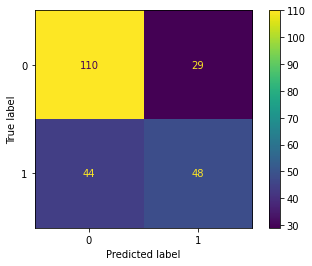

In [ ]:
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()
plt.show()